<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/%EC%A4%91%EA%B0%84%EC%8B%9C%ED%97%98_%EB%8C%80%EC%B2%B4%EA%B3%BC%EC%A0%9C(%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


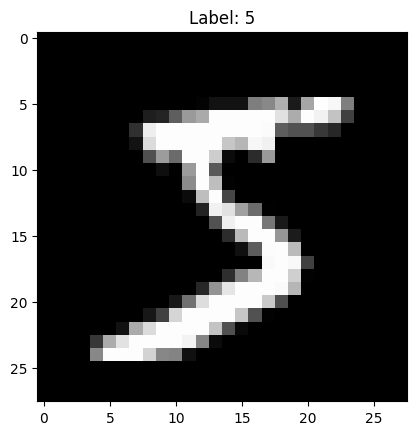

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape after one-hot encoding: (60000, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.7133 - loss: 1.1301 - val_accuracy: 0.8801 - val_loss: 0.4759
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8767 - loss: 0.4757 - val_accuracy: 0.8940 - val_loss: 0.3979
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8895 - loss: 0.4111 - val_accuracy: 0.9019 - val_loss: 0.3658
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8963 - loss: 0.3808 - val_accuracy: 0.9056 - val_loss: 0.3477
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8998 - loss: 0.3619 - val_accuracy: 0.9094 - val_loss: 0.3349
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9048 - loss: 0.3449 - val_accuracy: 0.9109 - val_loss: 0.3257
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9053 - loss: 0.3380 - val_accuracy: 0.9117 - val_loss: 0.3187
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9071 - loss: 0.3325 

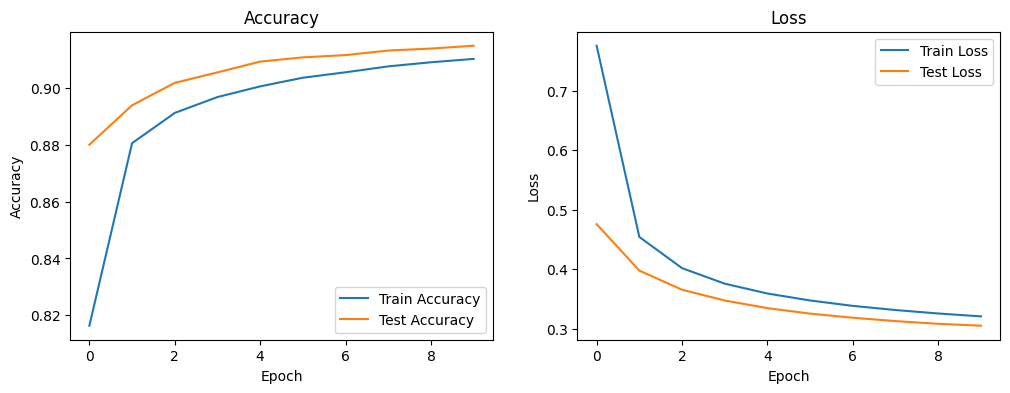

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicted probabilities: [1.2789323e-04 1.4877040e-07 1.3674998e-04 1.8230322e-03 1.1499529e-05
 4.1009895e-05 3.1037121e-07 9.9677956e-01 9.3197676e-05 9.8651904e-04]
Predicted Label: 7, True Label: 7


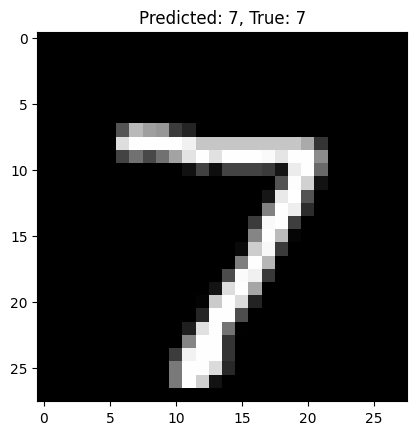

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드 (TensorFlow에서 제공)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 확인 (예시 이미지 출력)
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# 데이터의 형태 확인
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# 28x28 이미지를 784개의 피처로 변환 (Flatten)
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32')

X_train /= 255
X_test /= 255

# 레이블을 원-핫 인코딩으로 변환
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training labels shape after one-hot encoding: {y_train.shape}")

# 소프트맥스 회귀 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,), activation='softmax')  # 10개의 클래스 (0~9)
])

# 모델 컴파일 (손실 함수: Categorical Crossentropy, 최적화: SGD)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 구조 출력
model.summary()

# 모델 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 학습 후 테스트 데이터에서 성능 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# 학습 과정 시각화 (정확도와 손실)
plt.figure(figsize=(12, 4))

# 정확도 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 테스트 셋에서 첫 번째 이미지 예측
predictions = model.predict(X_test)

# 첫 번째 이미지의 예측 결과 (확률 분포)
print(f"Predicted probabilities: {predictions[0]}")

# 가장 높은 확률을 가진 클래스 출력
predicted_label = np.argmax(predictions[0])
true_label = np.argmax(y_test[0])
print(f"Predicted Label: {predicted_label}, True Label: {true_label}")

# 실제 이미지 출력
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.show()

